In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2005-01-01'
end = '2022-12-21'
stock = 'HDFCBANK.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,51.605000,52.779999,51.605000,52.525002,45.856434,1295580
1,2005-01-04,52.505001,53.099998,50.500000,51.945000,45.350056,2238060
2,2005-01-05,52.000000,52.000000,48.700001,50.005001,43.656361,3987870
3,2005-01-06,50.005001,50.980000,47.900002,48.514999,42.355530,4829510
4,2005-01-07,48.799999,49.375000,48.450001,49.025002,42.800781,2649000
...,...,...,...,...,...,...,...
4430,2022-12-14,1653.000000,1665.500000,1650.000000,1662.250000,1643.403564,7113820
4431,2022-12-15,1657.050049,1669.400024,1627.050049,1631.800049,1613.298950,9091324
4432,2022-12-16,1620.050049,1645.099976,1609.000000,1639.650024,1621.059814,7323979
4433,2022-12-19,1644.000000,1646.650024,1626.199951,1644.750000,1626.102051,4802271


In [6]:
ma_100_days = data.Close.rolling(100).mean()

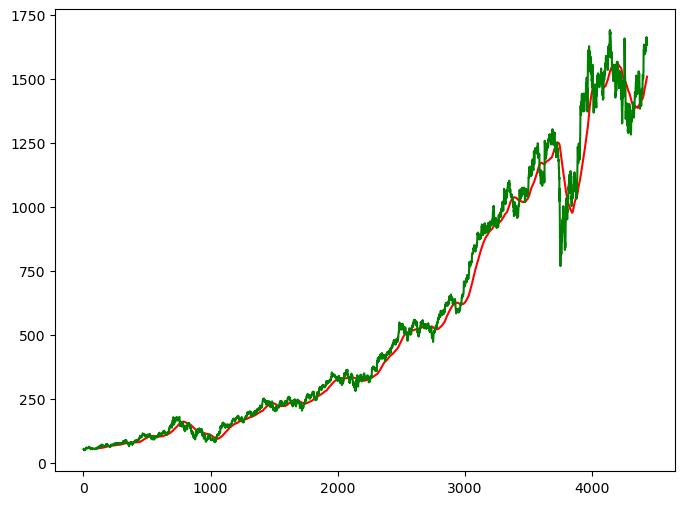

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

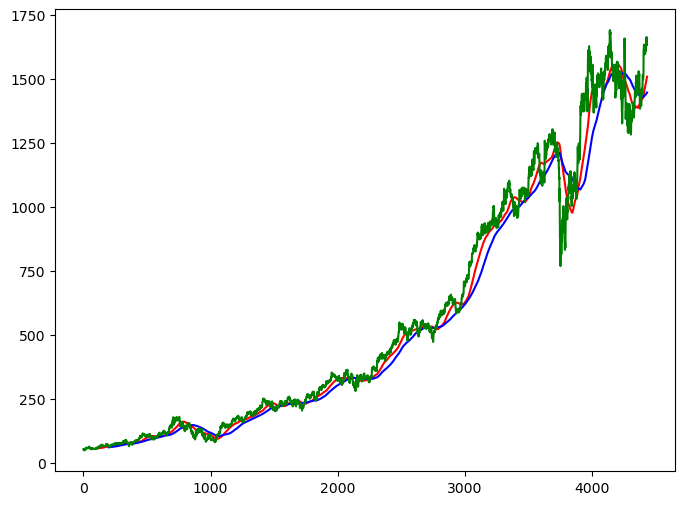

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

3548

In [13]:
data_test.shape[0]

887

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 237ms/step - loss: 0.0363
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 212ms/step - loss: 0.0042
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 42s 220ms/step - loss: 0.0036
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 297ms/step - loss: 0.0032
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 220ms/step - loss: 0.0030
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 210ms/step - loss: 0.0029
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - loss: 0.0024
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 210ms/step - loss: 0.0024
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 212ms/step - loss: 0.0029
Epoch 10/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - loss: 0.0021
Epoch 11/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 42s 218ms/step - loss: 0.0025
Epoch 12/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 23s 213ms/step - loss: 0.0023
Epoch 13/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - loss: 0.0020
Epoch 14/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 208ms/step - loss: 0.0021
Epoch 15/50
108

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [25]:
data_test_scale  =  scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step


In [28]:
y_pred = scaler.inverse_transform(y_predict)
y_inv = scaler.inverse_transform(y.reshape(-1, 1))

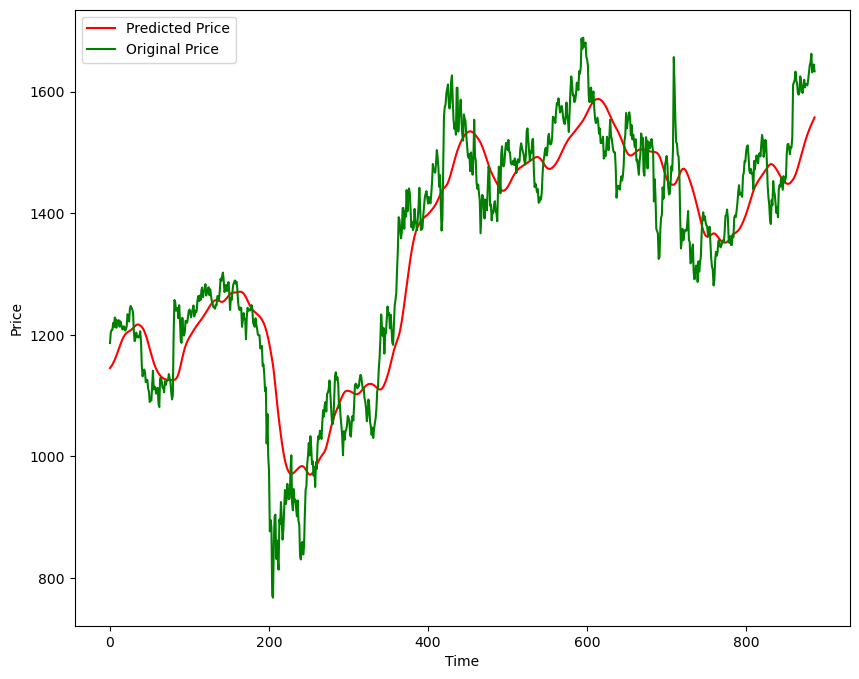

In [29]:
plt.figure(figsize=(10,8))
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.plot(y_inv, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━

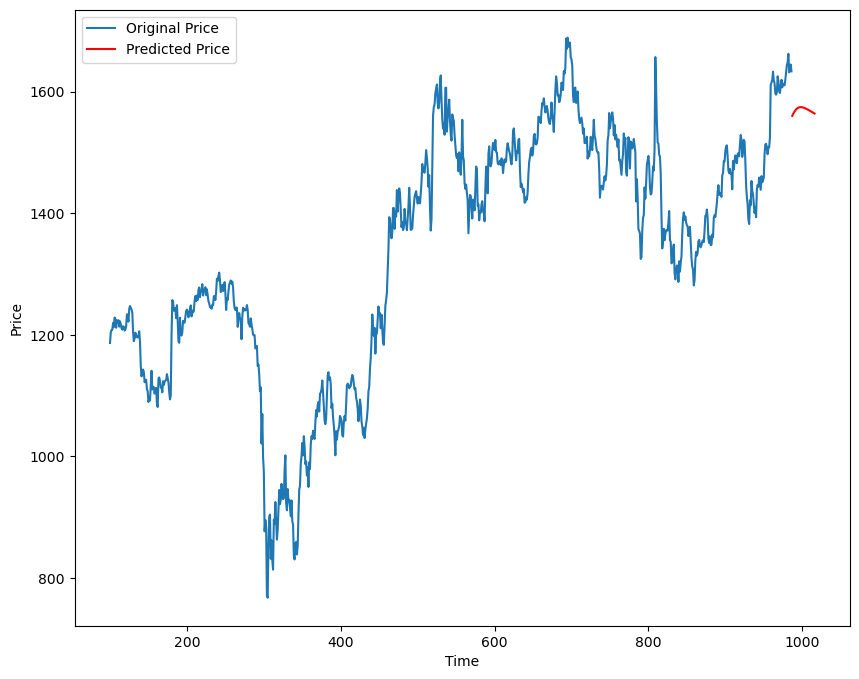

In [30]:
predictions = []
last_100_days = data_test_scale[-100:]

for _ in range(30):
    x_pred = np.array(last_100_days[-100:]).reshape(1, 100, 1)
    y_pred = model.predict(x_pred)
    predictions.append(y_pred[0, 0])
    last_100_days = np.append(last_100_days, y_pred)

predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

plt.figure(figsize=(10, 8))
plt.plot(data_test.index[-len(data_test) + 100:], data_test['Close'].values[-len(data_test) + 100:], label='Original Price')
plt.plot(np.arange(len(data_test), len(data_test) + 30), predicted_prices, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [32]:
model.save('Stock Predictions Model.keras')